In [1]:
import os

In [2]:
imdb_dir = "./data/aclImdb"

In [3]:
train_dir = os.path.join(imdb_dir, 'train')

### Extract labels and data from files

In [4]:
labels = []
texts = []

In [5]:
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [6]:
len(labels)

25000

In [7]:
len(texts)

25000

In [8]:
texts[0]

"Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form."

In [19]:
text_length = [len(text.split()) for text in texts]

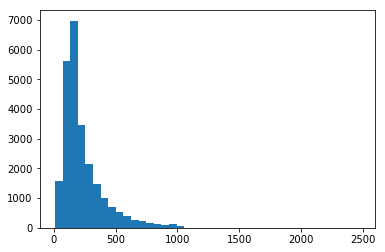

In [25]:
import matplotlib.pyplot as plt
plt.hist(text_length, bins=40)

plt.show()

### Tokenize data


In [28]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [29]:
maxlen = 150
training_samples = 200
validation_samples = 10000
max_words = 10000

In [30]:
tokenizer = Tokenizer(num_words=max_words)

In [31]:
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [32]:
word_index = tokenizer.word_index
print('Found {} tokens'.format(len(word_index)))

Found 88582 tokens


### Create data and labels from tokens

In [33]:
data = pad_sequences(sequences, maxlen=maxlen)

In [34]:
labels = np.asarray(labels)

In [35]:
print('Shape of data tensor:', data.shape)

Shape of data tensor: (25000, 150)


In [36]:
print('Shape of label tensor', labels.shape)

Shape of label tensor (25000,)


#### Randomize the order of training data

In [39]:
indices = np.arange(data.shape[0])

In [40]:
np.random.shuffle(indices)

In [41]:
type(data)

numpy.ndarray

In [42]:
data = data[indices]

In [43]:
labels = labels[indices]

### Split training and validation data

In [44]:
x_train =  data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

### Pull down pre-trained word-embeddings (GloVe)